# Data download and processing from Swissprot

Downloaded the data on 13th of May 2024. 571,282 results filtering for reviewed "Swiss-Prot". (https://www.uniprot.org/uniprotkb?query=*&facets=reviewed%3Atrue)

Selected download TSV and the columns, Seqeunce (under Sequences tab), EC number (under Function).

Unzipped the downloaded file.

## 1. Protein to EC processing


In [32]:
import pandas as pd

swissprot = pd.read_csv('raw_data/uniprotkb_AND_reviewed_true_AND_protein_2024_05_01.tsv', sep='\t')
swissprot

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-; 3.2.2.6,269
1,A0A023I7E1,ENG1_RHIMI,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,796
2,A0A024B7W1,POLG_ZIKVF,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,2.1.1.56; 2.1.1.57; 2.7.7.48; 3.4.21.91; 3.6.1...,3423
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
...,...,...,...,...,...
254924,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584
254925,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573
254926,Q7TDB6,RDRP_MYRV9,MSLTSRYTHFVPDSTITEILNDSNTPQILLHYANIVNGSTPVHFTS...,2.7.7.48,1354
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


In [33]:
# Filter to only include sequneces < 512
swissprot = swissprot[swissprot['Length'] < 512]
swissprot = swissprot[swissprot['Length'] >= 100 ]
swissprot

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-; 3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
8,A0A061I403,FICD_CRIGR,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108; 3.1.4.-,455
...,...,...,...,...,...
254913,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
254914,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


## Explode out EC number so each EC has it's own row

In [34]:
# Drop rows that don't have an ec number
swissprot = swissprot[swissprot['EC number'].notna()]
print(len(swissprot))
# Now expand out the ones we have left
swissprot['EC number'] = [ec.split(';') for ec in swissprot['EC number']]
swissprot = swissprot.explode('EC number')
# Clean the EC numbers
swissprot['EC number'] = [ec.replace(' ', '') for ec in swissprot['EC number']]
swissprot

195265


/tmp/ipykernel_3559200/662554174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swissprot['EC number'] = [ec.split(';') for ec in swissprot['EC number']]


,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
...,...,...,...,...,...
254913,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
254914,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


## Filtering steps 

* Filter to a certain sequence length
* Drop duplicates
* Remove EC numbers with dash

In [35]:
swissprot = swissprot[~swissprot['EC number'].str.contains('-')]
swissprot = swissprot.drop_duplicates(subset=['Sequence', 'EC number'])
swissprot

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
8,A0A061I403,FICD_CRIGR,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108,455
...,...,...,...,...,...
254913,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
254914,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


### Comparison to the dataset used in CLEAN

CLEAN: https://www.science.org/doi/10.1126/science.adf2465 


Dataset was downloaded from the CLEA repository: https://github.com/tttianhao/CLEAN/tree/main/app/data specifically the split 100 dataset, alternatively they can be downloaded from: https://drive.google.com/file/d/1MzYQ--CRK253eAKOmZrD1nzF-mXHfXtq/view


In [36]:
clean_df = pd.read_csv('raw_data/CLEAN_split100.tsv', sep='\t')
clean_df = clean_df.drop_duplicates(subset=['Sequence', 'EC number'])
clean_df

,Entry,EC number,Sequence
0,P51451,2.7.10.2,MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...
1,C7C422,3.5.2.6,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...
2,Q07457,2.3.2.27,MTAEPATKKIKLELSDPSEPLTQSDVIAFQKEALFRCINRRRVDFE...
3,Q07009,3.4.22.53,MAGIAMKLAKDREAAEGLGSHERAIKYLNQDYETLRNECLEAGALF...
4,Q9TTH8,3.4.22.54,MPTVISASVAPRTGAEPRSPGPIAQAAQGKGTEAGGGNPSGIYSAI...
...,...,...,...
227357,Q97HD1,3.1.11.6,MPSKKESYESMIKELEKIVSSMENEELPLEEAMKNYEDGVKLCDKL...
227358,A0A140CUL9,1.1.99.13,MAENNTYDAIVIGSGISGGWATKELTEKGLKTLMLERGRNIEHVKD...
227359,W6JQJ6,1.13.12.2,MNKNNRHPADGKKPITIFGPDFPFAFDDWLEHPAGLGSIPAARHGE...
227360,B3IVI7,3.5.1.30,MRIALYQGAPKPLDVPGNLQRLRHQAQLAAERGAQLLVCPEMFLTG...


In [55]:
clean_df['Length'] = [len(seq) for seq in clean_df['Sequence']]
clean_df = clean_df[clean_df['Length'] < 512]
clean_df = clean_df[clean_df['Length'] >= 100]
clean_df

,Entry,EC number,Sequence,Length
0,P51451,2.7.10.2,MGLVSSKKPDKEKPIKEKDKGQWSPLKVSAQDKDAPPLPPLVVFNH...,505
1,C7C422,3.5.2.6,MELPNIMHPVAKLSTALAAALMLSGCMPGEIRPTIGQQMETGDQRF...,270
6,P00917,4.2.1.1,MAHSDWGYDSPNGPZEWVKLYPIANGNNQSPIDIKTSETKHDTSLK...,261
7,Q9ULX7,4.2.1.1,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,337
11,P10506,2.7.12.2,MFKRRRNPKGLVLNPNASVKSSDNDHKEELINNQKSFESNVEAFME...,340
...,...,...,...,...
227341,Q9KQH9,2.3.1.179,MSKRRVVVTGMGMLSPVGNTVESSWKALLAGQSGIVNIEHFDTTNF...,414
227352,Q11WK3,6.3.5.2,MTEKILILDFGSQYTQLIARRVRELNVYCEIHPYNKAPQIDGTVKG...,509
227354,B1KNT2,4.2.1.59,MSEQLNTMDIKEIMSFLPHRYPFLLIDRVLDYTPGETLHAIKNVTI...,152
227360,B3IVI7,3.5.1.30,MRIALYQGAPKPLDVPGNLQRLRHQAQLAAERGAQLLVCPEMFLTG...,264


## 2. Reaction to EC processing

EC and reaction data were downloaded from multiple sources, the first being ECReact.

1. ECReact: https://www.nature.com/articles/s41467-022-28536-w, with the data downloaded from https://github.com/rxn4chemistry/biocatalysis-model specifically, https://github.com/rxn4chemistry/biocatalysis-model/blob/main/data/ecreact-1.0.csv
2. EnzymeMap: https://chemrxiv.org/engage/chemrxiv/article-details/643e9f4034f4ff2ea4f4f84e https://zenodo.org/records/8254726 and the data https://github.com/hesther/enzymemap, using the data file https://github.com/hesther/enzymemap/blob/main/data/processed_reactions.csv.gz

In [38]:
ECreact = pd.read_csv('raw_data/ECReact.csv')
ECreact['rxn_smiles'] = ECreact['rxn_smiles'].str.split('|').str[0] + '>>' + ECreact['rxn_smiles'].str.split('>>').str[1]
ECreact.rename(columns={'rxn_smiles': 'Reaction', 'ec': 'EC number', 'source':'Source'}, inplace=True)
ECreact

,Reaction,EC number,Source
0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,1.2.1.8,brenda_reaction_smiles
1,C=C(C)CCOP(=O)([O-])OP(=O)([O-])[O-].CC(C)=CCO...,2.5.1.85,brenda_reaction_smiles
2,N.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O...,1.4.1.4,brenda_reaction_smiles
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,1.1.1.3,brenda_reaction_smiles
4,Cc1cn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2.7.7.9,brenda_reaction_smiles
...,...,...,...
62217,CCCCC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CCC(=O)O[C@@...,2.3.1.76,pathbank_reaction_smiles
62218,CCCCCCCCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O...,2.7.8.41,pathbank_reaction_smiles
62219,CCCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCCCC...,2.7.8.41,pathbank_reaction_smiles
62220,CCCCCC/C=C\CCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCC...,2.7.8.41,pathbank_reaction_smiles


In [39]:
enzymemap = pd.read_csv('raw_data/EnzymeMap.csv')
enzymemap.rename(columns={'ec_num': 'EC number', 'unmapped': 'Reaction', 'mapped': 'Mapped Reaction', 'orig_rxn_text':'Reaction Text'}, inplace=True)
enzymemap = enzymemap[['Reaction', 'Mapped Reaction', 'EC number', 'Reaction Text']]
enzymemap.drop_duplicates(subset=['Reaction', 'EC number'], inplace=True)
enzymemap

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
25,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,[CH3:1][C:2](=[O:3])[CH:4]=[O:5].[H+].[NH2:6][...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
26,CC(=O)CO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,[CH3:1][C:2](=[O:3])[CH2:4][OH:5].[NH2:6][C:7]...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
27,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,2-dehydro-3-deoxy-D-gluconate + NADH + H+ = 4-...
...,...,...,...,...
349453,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][O:6][P:7](...,6.5.1.3,ATP + dimethylallyl diphosphate = dimethylally...
349454,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl diphosphate = geranyl-triphospho...
349455,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl triphosphate = geranyl-tetraphos...
349456,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl diphosphate = adenosine 5'-i...


In [40]:
enzymemap.dropna(subset=['Mapped Reaction'])

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
25,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,[CH3:1][C:2](=[O:3])[CH:4]=[O:5].[H+].[NH2:6][...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
26,CC(=O)CO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,[CH3:1][C:2](=[O:3])[CH2:4][OH:5].[NH2:6][C:7]...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
27,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,2-dehydro-3-deoxy-D-gluconate + NADH + H+ = 4-...
...,...,...,...,...
349453,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][O:6][P:7](...,6.5.1.3,ATP + dimethylallyl diphosphate = dimethylally...
349454,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl diphosphate = geranyl-triphospho...
349455,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl triphosphate = geranyl-tetraphos...
349456,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl diphosphate = adenosine 5'-i...


### Append EC numbers that are covered by ECreact but not by EnzymeMap, to EnzymeMap

In [41]:
#find the EC numbers covered by ECreact but not by enzymemap
ECreact = ECreact[~ECreact['EC number'].str.contains('-')]
not_covered = ECreact[~ECreact['EC number'].isin(enzymemap['EC number'].unique())]
not_covered['EC number'].nunique()

2353

In [42]:
reaction2EC = pd.concat((enzymemap, not_covered[['Reaction', 'EC number']])).sort_values(by='EC number')
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1172,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1173,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1176,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
1177,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...,...
15228,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...,NaN,7.6.2.j,NaN
21396,C[C@@]1(O)OC[C@H](O)C1(O)O.Nc1ncnc2c1ncn2[C@@H...,NaN,7.6.2.l,NaN
34012,*CS(=O)(=O)[O-].Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO...,NaN,7.6.2.o,NaN
15541,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1.Nc1ncnc2c1ncn2...,NaN,7.6.2.p,NaN


## 3. Filter protein2EC and reaction2EC to intersection of their EC numbers

In [43]:
swissprot = swissprot[swissprot['EC number'].isin(reaction2EC['EC number'].unique())]
swissprot

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
14,A0A068J840,UGT1_PANGI,MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...,2.4.1.363,475
...,...,...,...,...,...
254913,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178
254914,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


## Save unique proteins

#save the indices corresponding to unique proteins, for downstream use
unique_protein_indices = swissprot.reset_index().drop_duplicates(subset=['Sequence']).index
with open('unique_protein_indices.txt', 'w') as f:
    for index in unique_protein_indices:
        f.write(str(index) + '\n')

In [45]:
reaction2EC = reaction2EC[reaction2EC['EC number'].isin(swissprot['EC number'].unique())]
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1172,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1173,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1176,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
1177,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...,...
34226,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,NaN,7.6.2.8,NaN
34223,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,NaN,7.6.2.8,NaN
15471,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,NaN,7.6.2.9,NaN
644,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,NaN,7.6.2.9,NaN


In [46]:
reaction2EC.to_csv('../processed_data/reaction2EC.csv', index=False)

## 4. Perform protein clustering using mmseqs

In [47]:
#generate a fasta file as input to mmseqs
with open('clustering/swissprot.fasta', 'w') as f:
    for index, row in swissprot.iterrows():
        f.write(f'>{row["Entry"]}\n{row["Sequence"]}\n')

In [48]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes50 clustering/mmseqs_tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1

easy-cluster clustering/swissprot.fasta clustering/clusterRes50 clustering/mmseqs_tmp --min-seq-id 0.5 -c 0.8 --cov-mode 1 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residu

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 51.14K 0s 96ms     
Clustering step 2
[=================================================================] 100.00% 36.44K 0s 202ms    =====================>                                           ] 32.46% 11.83K eta 0s       
Write merged clustering
[=================================================================] 100.00% 149.79K 0s 462ms    
Time for merging to clu_redundancy: 0h 0m 0s 27ms
Time for processing: 0h 0m 0s 538ms
rmdb clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/linclust/5404717882821860712/pref_filter1 -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/linclust/5404717882821860712/pref -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/linclust/5404717882821860712/pref_rescore1 -v 3 

Time for processing: 0h 0m 0s 5ms
rmdb clustering/mms

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 24.66K 0s 127ms    
Index table: Masked residues: 31940
Index table: fill
[=================================================================] 100.00% 24.66K 0s 135ms    ========>                         ] 60.14% 14.83K eta 0s       
Index statistics
Entries:          5369908
DB size:          519 MB
Avg k-mer size:   0.083905
Top 10 k-mers
    GPGGTL	89
    GQQVAR	77
    STYLGG	53
    GSELFN	53
    AYPWGT	52
    FNLPNP	50
    FPHNAQ	49
    FREPGR	49
    GRGHCS	48
    TGNKTT	44
Time for index table init: 0h 0m 0s 605ms
Process prefiltering step 1 of 1

k-mer similarity threshold: 145
Starting prefiltering scores calculation (step 1 of 1)
Query db start 1 to 24660
Target db start 1 to 24660
[=================================================================] 100.00% 24.66K 0s 215ms    K eta 0s       ==============================>   ] 94.47% 23.30K eta 0s       
[===================================================

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



17 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step2: 0h 0m 0s 15ms
Time for processing: 0h 0m 1s 403ms
align clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/input_step2 clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/input_step2 clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/pref_step2 clustering/mmseqs_tmp/18009605123812206450/clu_tmp/5777700569579494009/aln_step2 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 1 --max-seq-len 65535 --comp-bias-corr 1 --comp-bias-corr-scale 1 --max-rejected 2147483647 --max-accept 2147483647 --add-self-matches 0 --db-load-mode 0 --pca substitution:1.100,context:1.400 --pcb substitution:4.100,context:5.800 --score-bias 0 --realign 0 --realign-score-bias -0.2 --realign-max-seqs 2147483

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [49]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes30 clustering/mmseqs_tmp --min-seq-id 0.3 -c 0.8 --cov-mode 1

easy-cluster clustering/swissprot.fasta clustering/clusterRes30 clustering/mmseqs_tmp --min-seq-id 0.3 -c 0.8 --cov-mode 1 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residu

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 51.14K 0s 99ms     
Clustering step 2
[=================================================================] 100.00% 28.29K 0s 205ms      ] 83.03% 23.49K eta 0s       
Write merged clustering
[=================================================================] 100.00% 149.79K 0s 412ms                                                      ] 5.01% 7.51K eta 6s       
Time for merging to clu_redundancy: 0h 0m 0s 19ms
Time for processing: 0h 0m 0s 478ms
rmdb clustering/mmseqs_tmp/1342346348063921006/clu_tmp/1588136530516962783/linclust/6919856536007606354/pref_filter1 -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/1342346348063921006/clu_tmp/1588136530516962783/linclust/6919856536007606354/pref -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb clustering/mmseqs_tmp/1342346348063921006/clu_tmp/1588136530516962783/linclust/6919856536007606354/pref_rescore1 -v 3 

Time for processing: 0h 0m 0s 4ms
rmdb clu

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Index statistics
Entries:          3561501
DB size:          508 MB
Avg k-mer size:   0.055648
Top 10 k-mers
    IHDKNI	43
    GPGGTL	39
    GLGIGK	24
    RDKELL	22
    AVGGGL	20
    LVGGGL	20
    VVGGGL	19
    KKGARN	19
    GQQVAR	18
    VHDKNL	15
Time for index table init: 0h 0m 0s 508ms
Process prefiltering step 1 of 1

k-mer similarity threshold: 136
Starting prefiltering scores calculation (step 1 of 1)
Query db start 1 to 12230
Target db start 1 to 12230
[=================================================================] 100.00% 12.23K 0s 137ms    =====================================>                      ] 65.01% 7.95K eta 0s       
[===============================================================> ] 97.72% 11.95K eta 0s       
22.120738 k-mers per position
617 DB matches per sequence
0 overflows
7 sequences passed prefiltering per query sequence
6 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step1: 0h 0m 0s 12ms
Time for processing: 0h

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Time for merging to cluster.tsv: 0h 0m 0s 13ms
Time for processing: 0h 0m 0s 188ms
result2repseq clustering/mmseqs_tmp/1342346348063921006/input clustering/mmseqs_tmp/1342346348063921006/clu clustering/mmseqs_tmp/1342346348063921006/clu_rep --db-load-mode 0 --compressed 0 --threads 384 -v 3 

[=================================================================] 100.00% 6.96K 0s 35ms     
Time for merging to clu_rep: 0h 0m 0s 14ms
Time for processing: 0h 0m 0s 225ms
result2flat clustering/mmseqs_tmp/1342346348063921006/input clustering/mmseqs_tmp/1342346348063921006/input clustering/mmseqs_tmp/1342346348063921006/clu_rep clustering/mmseqs_tmp/1342346348063921006/rep_seq.fasta --use-fasta-header -v 3 

Time for processing: 0h 0m 0s 27ms
createseqfiledb clustering/mmseqs_tmp/1342346348063921006/input clustering/mmseqs_tmp/1342346348063921006/clu clustering/mmseqs_tmp/1342346348063921006/clu_seqs --threads 384 -v 3 

[=================================================================] 100.00%

23633
6958


,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721
4,A0A068J840,UGT1_PANGI,MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...,2.4.1.363,475,Q2V6K0,Q40287
...,...,...,...,...,...,...,...
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352
149784,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8
149785,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115
149786,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8


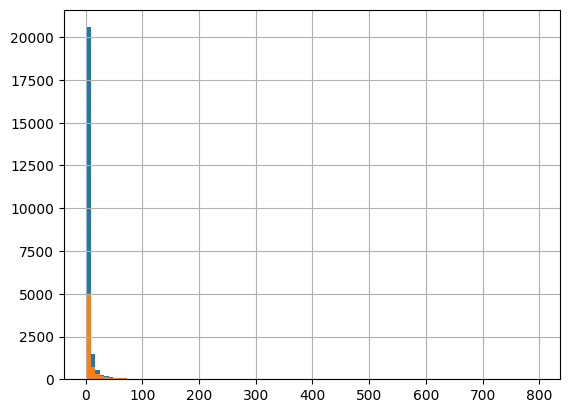

In [50]:
def process_clustering(name):
    clustering = pd.read_csv('clustering/{}_cluster.tsv'.format(name), delimiter='\t', header=None)
    #rename heading as cluster reference and id
    clustering.columns = [name, 'Entry']
    clustering.drop_duplicates(subset='Entry', keep='first', inplace=True)
    print(clustering[name].nunique())
    clustering[name].value_counts().hist(bins=100)
    return clustering

swissprot = swissprot[['Entry', 'Entry Name', 'Sequence', 'EC number', 'Length']]

cluster50 = process_clustering('clusterRes50')
cluster30 = process_clustering('clusterRes30')

swissprot = pd.merge(swissprot, cluster50, on='Entry', how='left')
swissprot = pd.merge(swissprot, cluster30, on='Entry', how='left')
swissprot

In [51]:
swissprot.to_csv('../processed_data/protein2EC.csv', index=False)

# Finally process textual description of EC numbers
This is optionally used in CREEP

In [52]:
#read ECtoGO.txt line by line
ECtoGO = open("raw_data/ECtoGO_raw.txt", "r")
ECtoGO_lines = ECtoGO.readlines()
ECtoGO.close()

#skip the first two lines
ECtoGO_lines = ECtoGO_lines[2:]
EC2desc = {}
for line in ECtoGO_lines:
    line = line.strip().split(">")
    EC = line[0][3:-1]
    desc = line[1].split(";")[0][4:-1]
    EC2desc[EC] = desc

def get_EC_desc(EC):
    num_dashes = EC.count('-')

    description_missing = False
    EC1 = '.'.join(EC.split('.')[:1])
    if EC1 + '.-.-.-' in EC2desc and num_dashes < 3:
        desc1 = EC2desc[EC1 + '.-.-.-']
    else:
         desc1 = ''
    EC2 = '.'.join(EC.split('.')[:2]) 
    if EC2 + '.-.-' in EC2desc and num_dashes < 2:
        desc2 = EC2desc[EC2 + '.-.-']
    else:
        desc2 = ''
    EC3 = '.'.join(EC.split('.')[:3])
    if EC3 + '.-' in EC2desc and num_dashes < 1:
        desc3 = EC2desc[EC3 + '.-']
    else:
        desc3 = ''
        
    if EC in EC2desc:
        desc4 = EC2desc[EC]
    else:
        description_missing = True
        desc4 = ''

  
    description = desc1 + '; ' + desc2 + '; ' + desc3 + '; ' + desc4
    description = description.replace(' ; ', ' ')
    description = description.replace(' ; ', ' ')
    description = description.replace(' ; ', ' ')
    description = description.replace(' activity', '')
    #if string starts with ;, replace with space
    if description[0] == ';':
        description = description[2:]
    if description[-2:] == '; ':
        description = description[:-2]
    return description

#subset to the EC numbers in swissprot
EC2desc_df = pd.DataFrame(swissprot['EC number'].unique(), columns=['EC number'])
EC2desc_df['Text'] = EC2desc_df['EC number'].apply(get_EC_desc)
EC2desc_df['Text Incomplete'] = ~EC2desc_df['EC number'].isin(EC2desc.keys())
EC2desc_df = EC2desc_df.sort_values(by='EC number')
EC2desc_df = EC2desc_df[EC2desc_df['EC number'].isin(swissprot['EC number'].unique())]
EC2desc_df

,EC number,Text,Text Incomplete
216,1.1.1.1,"oxidoreductase; oxidoreductase, acting on CH-O...",False
2008,1.1.1.10,"oxidoreductase; oxidoreductase, acting on CH-O...",False
1231,1.1.1.100,"oxidoreductase; oxidoreductase, acting on CH-O...",False
1646,1.1.1.101,"oxidoreductase; oxidoreductase, acting on CH-O...",False
1616,1.1.1.102,"oxidoreductase; oxidoreductase, acting on CH-O...",False
...,...,...,...
1535,7.6.2.16,primary active transmembrane transporter; ABC-...,False
2973,7.6.2.5,primary active transmembrane transporter; ABC-...,False
3871,7.6.2.7,primary active transmembrane transporter; ABC-...,False
1043,7.6.2.8,primary active transmembrane transporter; ABC-...,False


In [53]:
EC2desc_df.to_csv('../processed_data/text2EC.csv', index=False)

In [54]:
#save ECs to a txt as the order of the cluster centers for downstream tasks
with open('../processed_data/EC_list.txt', 'w') as f:
    for ec in EC2desc_df['EC number']:
        f.write(ec + '\n')